<a href="https://colab.research.google.com/github/Gweneal3/DeepLearning_YT/blob/master/Dog%20Cat%20Classification%20using%20Transfer%20Learning/Dog_Cat_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

MobileNet V2 <- use this<br>
Others:

VGG-16

ResNet50

Inceptionv3

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:18<00:00, 45.8MB/s]
100% 812M/812M [00:18<00:00, 46.0MB/s]


In [5]:
from zipfile import ZipFile

dataset = './dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


In [7]:
# count the no. of files in train folder
path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print('No. of images',file_count)

No. of images 25000


In [8]:
file_names = os.listdir('train')
file_names

['dog.10919.jpg',
 'dog.11251.jpg',
 'dog.9949.jpg',
 'cat.1506.jpg',
 'dog.7432.jpg',
 'dog.5162.jpg',
 'dog.11697.jpg',
 'dog.2446.jpg',
 'cat.1615.jpg',
 'dog.5418.jpg',
 'dog.11166.jpg',
 'dog.1858.jpg',
 'dog.2048.jpg',
 'dog.718.jpg',
 'cat.10126.jpg',
 'dog.5436.jpg',
 'cat.8467.jpg',
 'dog.10817.jpg',
 'dog.11059.jpg',
 'cat.12404.jpg',
 'dog.10163.jpg',
 'dog.4148.jpg',
 'cat.9389.jpg',
 'dog.11925.jpg',
 'cat.5405.jpg',
 'dog.6716.jpg',
 'cat.4459.jpg',
 'cat.9556.jpg',
 'dog.5287.jpg',
 'dog.9849.jpg',
 'cat.8613.jpg',
 'cat.3119.jpg',
 'cat.9399.jpg',
 'dog.8444.jpg',
 'dog.11619.jpg',
 'cat.2005.jpg',
 'dog.9055.jpg',
 'dog.4561.jpg',
 'cat.6019.jpg',
 'cat.9775.jpg',
 'dog.11946.jpg',
 'dog.680.jpg',
 'dog.12268.jpg',
 'dog.2526.jpg',
 'cat.5158.jpg',
 'dog.6405.jpg',
 'dog.4498.jpg',
 'dog.3523.jpg',
 'dog.10831.jpg',
 'dog.6067.jpg',
 'dog.5329.jpg',
 'dog.7413.jpg',
 'dog.494.jpg',
 'cat.3171.jpg',
 'cat.2073.jpg',
 'dog.1859.jpg',
 'dog.9927.jpg',
 'cat.3300.jpg',
 'c

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display images

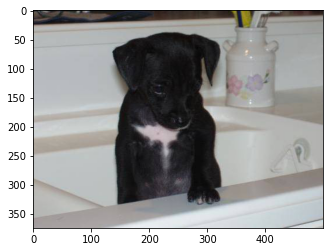

In [10]:
img = mpimg.imread('./train/dog.8298.jpg')
plt.imshow(img)

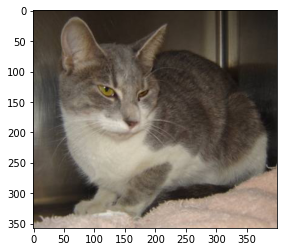

In [11]:
img = mpimg.imread('./train/cat.4352.jpg')
plt.imshow(img)

In [12]:
file_names = os.listdir('./train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1

print('No. of dog images =', dog_count)
print('No. of cat images =', cat_count)

No. of dog images = 12500
No. of cat images = 12500


Resize all images

In [13]:
os.mkdir('./image_resized')

In [14]:
original_folder = '/content/train/'
resized_folder = './image_resized/'

for i in range(3000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

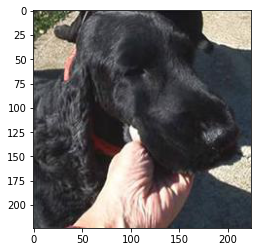

In [15]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.11251.jpg')
imgplt = plt.imshow(img)
plt.show()

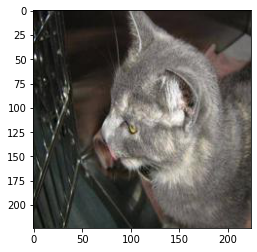

In [16]:
# display resized cat image
img = mpimg.imread('/content/image_resized/cat.1506.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating Labels

Cat --> 0

Dog --> 1

In [17]:
# creaing a for loop to assign labels
file_names = os.listdir('./image_resized/')


labels = []

for i in range(3000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [18]:
print(file_names[0:5])
print(labels[0:5])

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg']
[1, 1, 1, 0, 1]


In [19]:
# counting images of dogs and cats
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1503 1497]


Convert resized images to numpy arrays

In [20]:
import cv2
import glob

In [21]:
image_dir = '/content/image_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
dog_cat_images.shape

(3000, 224, 224, 3)

In [23]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


Scale data

In [26]:
X_train = X_train/255
X_test = X_test/255

Build Model

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [29]:
num_of_class = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_class)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [31]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 63s 806ms/step - loss: 0.1716 - acc: 0.9292
Epoch 2/5
75/75 [==============================] - 59s 785ms/step - loss: 0.0598 - acc: 0.9792
Epoch 3/5
75/75 [==============================] - 60s 802ms/step - loss: 0.0437 - acc: 0.9867
Epoch 4/5
75/75 [==============================] - 59s 788ms/step - loss: 0.0355 - acc: 0.9892
Epoch 5/5
75/75 [==============================] - 64s 851ms/step - loss: 0.0266 - acc: 0.9912


In [32]:
score, acc = model.evaluate(X_test, Y_test)

19/19 [==============================] - 22s 1s/step - loss: 0.0632 - acc: 0.9817


In [33]:
print(score)
print(acc)

0.06322436779737473
0.9816666841506958


Build Predictive System

In [34]:
from skimage import io

Image Path:https://images.unsplash.com/photo-1494256997604-768d1f608cac?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1229&q=80


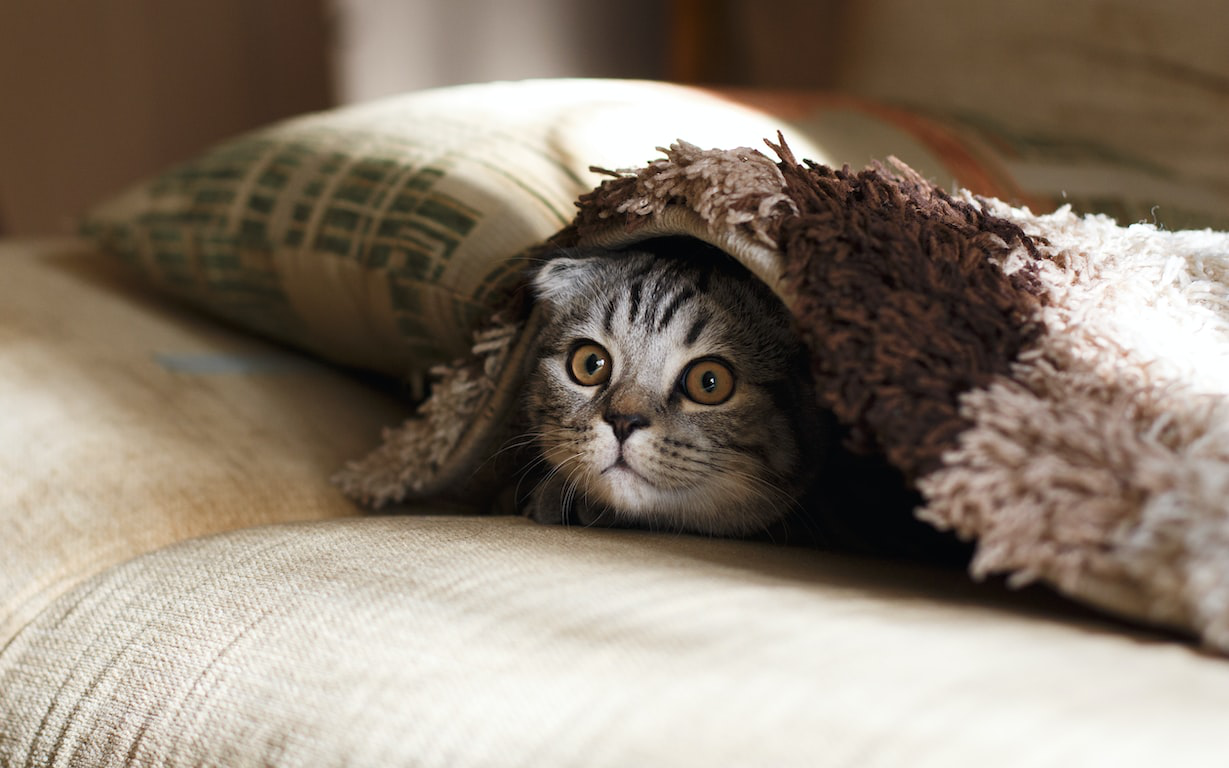

1/1 [==============================] - 0s 64ms/step
The image represents a Cat


In [38]:
input_image_path = input('Image Path:')
input_image = io.imread(input_image_path)
rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_image)

input_image_resize = cv2.resize(rgb_image,(224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_prediction_label = np.argmax(input_prediction)

if input_prediction_label == 0:
  print("The image represents a Cat")
else:
  print("The image represents a Dog")